# **Task-3**

## **NAME**: KARTHIK SANKHAR V
## **REG.NO**: 21MIA1152

## **Step 1:** Feature Extraction from Segmented Objects

### **1.	Segment the Image**

In [174]:
import cv2
import pandas as pd
import numpy as np
from skimage.feature import graycomatrix, graycoprops
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Original image


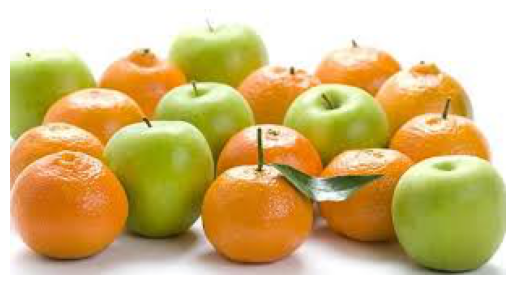

In [175]:
image = cv2.imread('images.jpeg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
print('Original image')
plt.axis('off')
plt.show()

HSV image


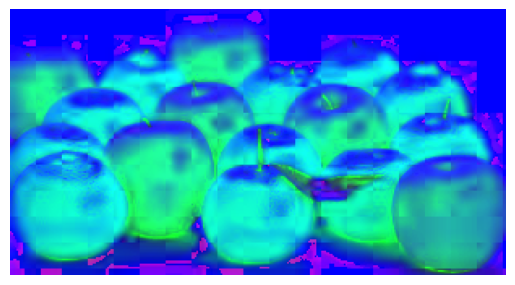

In [176]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_image)
print('HSV image')
plt.axis('off')
plt.show()

segmented objects


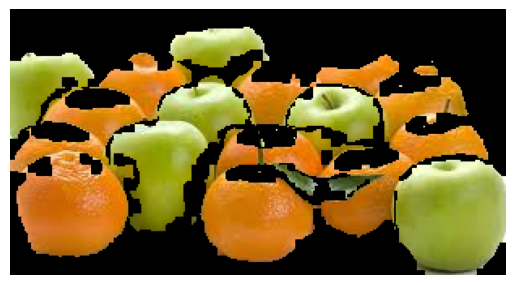

In [177]:
kernel = np.ones((5, 5), np.uint8)
lower_orange = np.array([5, 150, 150])
upper_orange = np.array([25, 255, 255])
mask_orange = cv2.inRange(hsv_image, lower_orange, upper_orange)
mask_orange = cv2.morphologyEx(mask_orange, cv2.MORPH_CLOSE, kernel)
segmented_oranges = cv2.bitwise_and(image, image, mask=mask_orange)
lower_green = np.array([30, 40, 40])
upper_green = np.array([85, 255, 255])
mask_green = cv2.inRange(hsv_image, lower_green, upper_green)
mask_green = cv2.morphologyEx(mask_green, cv2.MORPH_CLOSE, kernel)
segmented_green_apples = cv2.bitwise_and(image, image, mask=mask_green)
combined_mask = cv2.bitwise_or(mask_orange, mask_green)
segmented_image = cv2.bitwise_and(image, image, mask=combined_mask)
color_segmented_rgb = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)


plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
print('segmented objects')
plt.axis('off')
plt.show()


### **2.	Identify the Objects of Interest**

Segmented Image with Contours


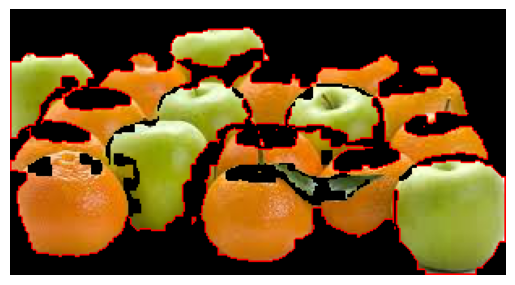

In [178]:
contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(segmented_image, contours, -1, (0, 0, 255), 1) 

plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
print('Segmented Image with Contours')
plt.axis('off')
plt.show()

### **3.Extract Features from Each Object**

In [179]:
from skimage.feature import graycomatrix, graycoprops
contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
areas = []
perimeters = []
mean_colors = []
texture_features = []
color_labels = []
def classify_color(mean_color):
    b, g, r = mean_color
    if r > g and r > b:  # Simplified logic for orange
        return 'Orange'
    elif g > r and g > b:  # Simplified logic for green
        return 'Green apple'
    else:
        return 'Unknown'
color_segmented_rgb = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)

for c in contours:
    area = cv2.contourArea(c)
    perimeter = cv2.arcLength(c, True)
    areas.append(area)
    perimeters.append(perimeter)
    object_mask = np.zeros_like(combined_mask)
    cv2.drawContours(object_mask, [c], -1, 255, thickness=cv2.FILLED)
    mean_color = cv2.mean(image, mask=object_mask)[:3]
    mean_colors.append(mean_color)
    color_label = classify_color(mean_color)
    color_labels.append(color_label)
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    glcm = graycomatrix(gray_img, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    texture_features.append((contrast, energy, homogeneity))

In [180]:
for i, cnt in enumerate(contours):
    print(f"  Area: {areas[i]}")
    print(f"  Perimeter: {perimeters[i]}")
    print(f"  Mean Color (BGR): {mean_colors[i]}")
    print(f"  Texture Features (Contrast, Energy, Homogeneity): {texture_features[i]}")
    print()

  Area: 0.0
  Perimeter: 2.0
  Mean Color (BGR): (54.5, 136.0, 155.5)
  Texture Features (Contrast, Energy, Homogeneity): (111.3671731307477, 0.1393292925861524, 0.4132012880620265)

  Area: 6.0
  Perimeter: 10.828427076339722
  Mean Color (BGR): (54.0, 103.41666666666666, 97.66666666666666)
  Texture Features (Contrast, Energy, Homogeneity): (111.3671731307477, 0.1393292925861524, 0.4132012880620265)

  Area: 6.0
  Perimeter: 10.828427076339722
  Mean Color (BGR): (104.91666666666666, 159.75, 152.66666666666666)
  Texture Features (Contrast, Energy, Homogeneity): (111.3671731307477, 0.1393292925861524, 0.4132012880620265)

  Area: 0.0
  Perimeter: 2.0
  Mean Color (BGR): (39.0, 74.0, 73.5)
  Texture Features (Contrast, Energy, Homogeneity): (111.3671731307477, 0.1393292925861524, 0.4132012880620265)

  Area: 0.0
  Perimeter: 0.0
  Mean Color (BGR): (205.0, 255.0, 255.0)
  Texture Features (Contrast, Energy, Homogeneity): (111.3671731307477, 0.1393292925861524, 0.4132012880620265)

  A

### **4.	Analyze and Use the Features**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         7

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Object Recognition


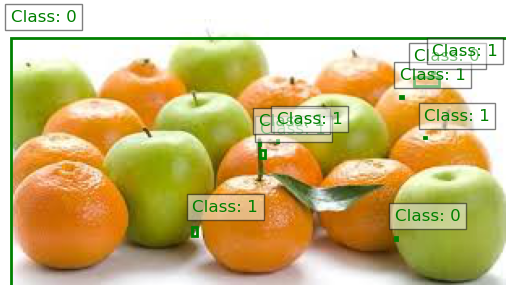

In [181]:
data = {
    'Area': areas,
    'Perimeter': perimeters,
    'Mean Color B': [color[0] for color in mean_colors],
    'Mean Color G': [color[1] for color in mean_colors],
    'Mean Color R': [color[2] for color in mean_colors],
    'Contrast': [feature[0] for feature in texture_features],
    'Energy': [feature[1] for feature in texture_features],
    'Homogeneity': [feature[2] for feature in texture_features],
}

df = pd.DataFrame(data)
labels = np.array([0 if label == 'Orange' else 1 for label in color_labels])
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.3, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(df)
print(classification_report(labels, predictions))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots()
plt.imshow(image_rgb)
for i, c in enumerate(contours):
    x, y, w, h = cv2.boundingRect(c)
    rect = plt.Rectangle((x, y), w, h, edgecolor='green', facecolor='none', linewidth=2)
    ax.add_patch(rect)
    ax.text(x, y - 10, f"Class: {predictions[i]}", color='green', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
ax.axis('off')
print('Object Recognition')
plt.show()

## **Step 2 :** Object Detection using the extracted features

### **1. Extract Features from a Reference Object**

### Orange

Original Orange o


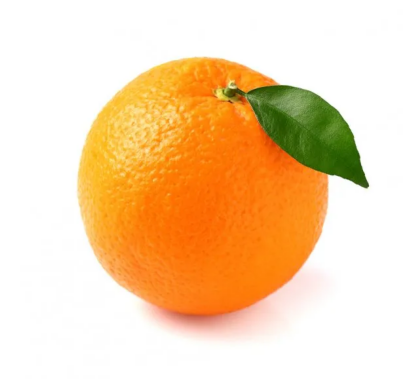

Contours (Shape Feature)


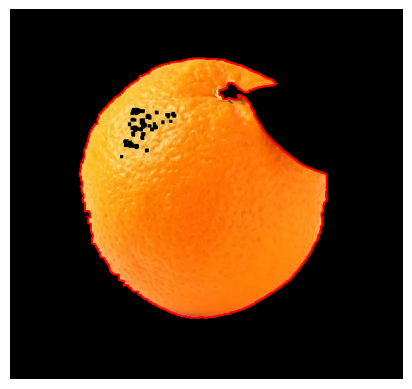

Orange Object 1:
  - Area: 0.0
  - Perimeter: 0.0
  - Mean Color (BGR): (101.0, 196.0, 247.0)
  - Texture (Contrast, Energy, Homogeneity): (19.371004771965076, 0.5048039468829293, 0.7694409376516582)

Orange Object 2:
  - Area: 106555.0
  - Perimeter: 1517.793058872223
  - Mean Color (BGR): (29.047456931528824, 142.48058537677335, 250.9917920401444)
  - Texture (Contrast, Energy, Homogeneity): (19.371004771965076, 0.5048039468829293, 0.7694409376516582)



In [160]:
o = cv2.imread('orange.webp')
plt.imshow(cv2.cvtColor(o, cv2.COLOR_BGR2RGB))
print('Original Orange o')
plt.axis('off')
plt.show()

hsv_o = cv2.cvtColor(o, cv2.COLOR_BGR2HSV)
lower_orange = np.array([5, 150, 150])
upper_orange = np.array([25, 255, 255])
mask_orange = cv2.inRange(hsv_o, lower_orange, upper_orange)

kernel = np.ones((5, 5), np.uint8)
mask_orange = cv2.morphologyEx(mask_orange, cv2.MORPH_CLOSE, kernel)


segmented_orange = cv2.bitwise_and(o, o, mask=mask_orange)



contours, _ = cv2.findContours(mask_orange, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(segmented_orange, contours, -1, (0, 0, 255), 2)

plt.imshow(cv2.cvtColor(segmented_orange, cv2.COLOR_BGR2RGB))
print('Contours (Shape Feature)')
plt.axis('off')
plt.show()


areas = []
perimeters = []
mean_colors = []
texture_features = []

for c in contours:
    
    area = cv2.contourArea(c)
    perimeter = cv2.arcLength(c, True)
    areas.append(area)
    perimeters.append(perimeter)
    
    
    object_mask = np.zeros_like(mask_orange)
    cv2.drawContours(object_mask, [c], -1, 255, thickness=cv2.FILLED)
    
    
    mean_color = cv2.mean(o, mask=object_mask)[:3]
    mean_colors.append(mean_color)
    
    
    gray_o = cv2.cvtColor(o, cv2.COLOR_BGR2GRAY)
    sobelx = cv2.Sobel(gray_o, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(gray_o, cv2.CV_64F, 0, 1, ksize=5)
    edges = cv2.magnitude(sobelx, sobely)
 

    
    glcm = graycomatrix(gray_o, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    texture_features.append((contrast, energy, homogeneity))


for i, c in enumerate(contours):
    print(f"Orange Object {i+1}:")
    print(f"  - Area: {areas[i]}")
    print(f"  - Perimeter: {perimeters[i]}")
    print(f"  - Mean Color (BGR): {mean_colors[i]}")
    print(f"  - Texture (Contrast, Energy, Homogeneity): {texture_features[i]}")
    print()


data = {
    'Area': areas,
    'Perimeter': perimeters,
    'Mean Color B': [color[0] for color in mean_colors],
    'Mean Color G': [color[1] for color in mean_colors],
    'Mean Color R': [color[2] for color in mean_colors],
    'Contrast': [feature[0] for feature in texture_features],
    'Energy': [feature[1] for feature in texture_features],
    'Homogeneity': [feature[2] for feature in texture_features],
}

df1 = pd.DataFrame(data)

### Green apple

Original Green Apple g


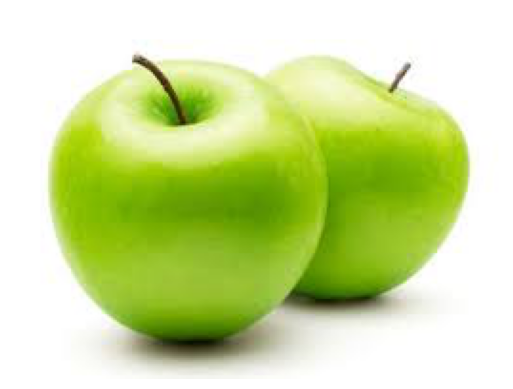

Segmented g with Contours


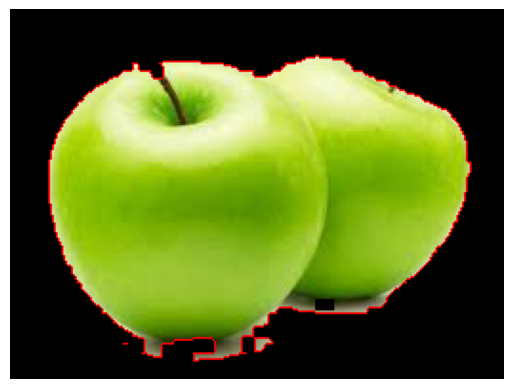

Object 1:
  Area: 0.0
  Perimeter: 4.0
  Mean Color (BGR): (169.0, 203.0, 202.66666666666666)
  Texture Features (Contrast, Energy, Homogeneity): (32.208982658035644, 0.30476445148353853, 0.6731143228837648)

Object 2:
  Area: 26151.5
  Perimeter: 770.2569208145142
  Mean Color (BGR): (57.13390700483092, 194.28411835748793, 157.04653532608694)
  Texture Features (Contrast, Energy, Homogeneity): (32.208982658035644, 0.30476445148353853, 0.6731143228837648)

      Area   Perimeter  Mean Color B  Mean Color G  Mean Color R   Contrast  \
0      0.0    4.000000    169.000000    203.000000    202.666667  32.208983   
1  26151.5  770.256921     57.133907    194.284118    157.046535  32.208983   

     Energy  Homogeneity  
0  0.304764     0.673114  
1  0.304764     0.673114  


In [161]:
g = cv2.imread('greenapple.jpeg')
plt.imshow(cv2.cvtColor(g, cv2.COLOR_BGR2RGB))
print('Original Green Apple g')
plt.axis('off')
plt.show()


hsv_g = cv2.cvtColor(g, cv2.COLOR_BGR2HSV)



kernel = np.ones((5, 5), np.uint8)
lower_green = np.array([30, 40, 40])
upper_green = np.array([85, 255, 255])
mask_green = cv2.inRange(hsv_g, lower_green, upper_green)
mask_green = cv2.morphologyEx(mask_green, cv2.MORPH_CLOSE, kernel)


segmented_g = cv2.bitwise_and(g, g, mask=mask_green)



contours, _ = cv2.findContours(mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(segmented_g, contours, -1, (0, 0, 255), 1)

plt.imshow(cv2.cvtColor(segmented_g, cv2.COLOR_BGR2RGB))
print('Segmented g with Contours')
plt.axis('off')
plt.show()


areas = []
perimeters = []
mean_colors = []
texture_features = []

for c in contours:
    area = cv2.contourArea(c)
    perimeter = cv2.arcLength(c, True)
    areas.append(area)
    perimeters.append(perimeter)
    
   
    object_mask = np.zeros_like(mask_green)
    cv2.drawContours(object_mask, [c], -1, 255, thickness=cv2.FILLED)
    
   
    mean_color = cv2.mean(g, mask=object_mask)[:3]
    mean_colors.append(mean_color)
    
   
    gray_img = cv2.cvtColor(g, cv2.COLOR_BGR2GRAY)
    glcm = graycomatrix(gray_img, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    texture_features.append((contrast, energy, homogeneity))


for i in range(len(contours)):
    print(f"Object {i + 1}:")
    print(f"  Area: {areas[i]}")
    print(f"  Perimeter: {perimeters[i]}")
    print(f"  Mean Color (BGR): {mean_colors[i]}")
    print(f"  Texture Features (Contrast, Energy, Homogeneity): {texture_features[i]}")
    print()


data = {
    'Area': areas,
    'Perimeter': perimeters,
    'Mean Color B': [color[0] for color in mean_colors],
    'Mean Color G': [color[1] for color in mean_colors],
    'Mean Color R': [color[2] for color in mean_colors],
    'Contrast': [feature[0] for feature in texture_features],
    'Energy': [feature[1] for feature in texture_features],
    'Homogeneity': [feature[2] for feature in texture_features],
}

df2 = pd.DataFrame(data)
print(df2)


### **2. Extract Features from the Target Image**

In [162]:
csv_filename = 'orangegreenapple.csv'
df.to_csv(csv_filename, index=False)
print(f"Data saved to {csv_filename}")

Data saved to orangegreenapple.csv


In [163]:
orangegreenapple = pd.read_csv('orangegreenapple.csv')
orangegreenapple

,Area,Perimeter,Mean Color B,Mean Color G,Mean Color R,Contrast,Energy,Homogeneity
0,0.0,2.000000,54.500000,136.000000,155.500000,111.367173,0.139329,0.413201
1,6.0,10.828427,54.000000,103.416667,97.666667,111.367173,0.139329,0.413201
2,6.0,10.828427,104.916667,159.750000,152.666667,111.367173,0.139329,0.413201
3,0.0,2.000000,39.000000,74.000000,73.500000,111.367173,0.139329,0.413201
4,0.0,0.000000,205.000000,255.000000,255.000000,111.367173,0.139329,0.413201
5,0.0,0.000000,192.000000,234.000000,233.000000,111.367173,0.139329,0.413201
6,0.0,2.000000,206.500000,246.000000,244.500000,111.367173,0.139329,0.413201
7,60.0,34.485281,49.428571,150.324675,223.714286,111.367173,0.139329,0.413201
8,0.0,0.000000,213.000000,255.000000,255.000000,111.367173,0.139329,0.413201
9,27595.0,2432.788007,55.365800,152.848655,192.309730,111.367173,0.139329,0.413201


In [164]:
csv_filename = 'orange.csv'
df1.to_csv(csv_filename, index=False)

print(f"Data saved to {csv_filename}")

Data saved to orange.csv


In [165]:
orange = pd.read_csv('orange.csv')
orange

,Area,Perimeter,Mean Color B,Mean Color G,Mean Color R,Contrast,Energy,Homogeneity
0,0.0,0.000000,101.000000,196.000000,247.000000,19.371005,0.504804,0.769441
1,106555.0,1517.793059,29.047457,142.480585,250.991792,19.371005,0.504804,0.769441


In [166]:
csv_filename = 'greenapple.csv'
df2.to_csv(csv_filename, index=False)
print(f"Data saved to {csv_filename}")

Data saved to greenapple.csv


In [167]:
greenapple = pd.read_csv('greenapple.csv')
greenapple

,Area,Perimeter,Mean Color B,Mean Color G,Mean Color R,Contrast,Energy,Homogeneity
0,0.0,4.000000,169.000000,203.000000,202.666667,32.208983,0.304764,0.673114
1,26151.5,770.256921,57.133907,194.284118,157.046535,32.208983,0.304764,0.673114


### **4. Locate and Identify the Object**

### Orange

Identified object


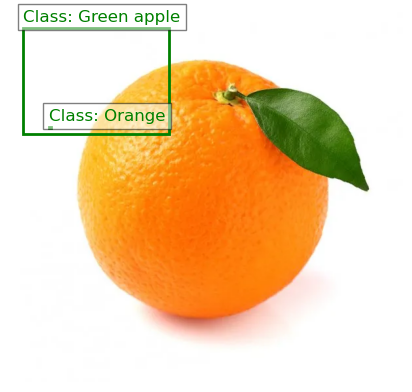

In [168]:
o = cv2.imread('orange.webp')
image_rgb = cv2.cvtColor(o, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
plt.imshow(image_rgb)
for i, c in enumerate(contours):
    x, y, w, h = cv2.boundingRect(c)
    rect = plt.Rectangle((x, y), w, h, edgecolor='green', facecolor='none', linewidth=2)
    ax.add_patch(rect)
    ax.text(x, y - 10, f"Class: {color_labels[i]}", color='green', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
ax.axis('off')
print('Identified object')
plt.show()

### Green apple

Identified object


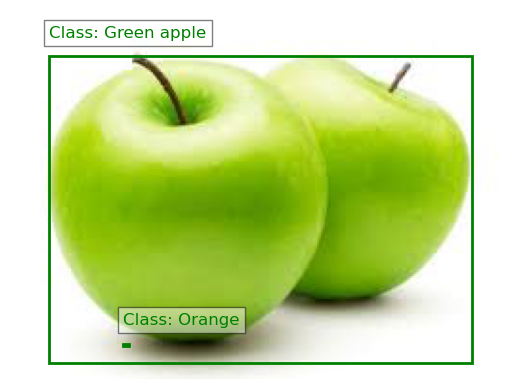

In [169]:
g = cv2.imread('greenapple.jpeg')
image_rgb = cv2.cvtColor(g, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
plt.imshow(image_rgb)
for i, c in enumerate(contours):
    x, y, w, h = cv2.boundingRect(c)
    rect = plt.Rectangle((x, y), w, h, edgecolor='green', facecolor='none', linewidth=2)
    ax.add_patch(rect)
    ax.text(x, y - 10, f"Class: {color_labels[i]}", color='green', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
ax.axis('off')
print('Identified object')
plt.show()

### **5. Visualize the Results**

Object Detection using the extracted features


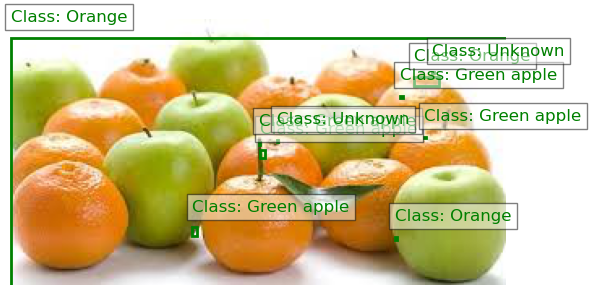

In [183]:
image = cv2.imread('images.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
plt.imshow(image_rgb)
for i, c in enumerate(contours):
    x, y, w, h = cv2.boundingRect(c)
    rect = plt.Rectangle((x, y), w, h, edgecolor='green', facecolor='none', linewidth=2)
    ax.add_patch(rect)
    ax.text(x, y - 10, f"Class: {color_labels[i]}", color='green', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
ax.axis('off')
print('Object Detection using the extracted features')
plt.show()
